In [31]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
stock = '^XAX'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1824.949951,1856.689941,1824.949951,1853.660034,1853.660034,180500
2010-01-05,1853.660034,1860.050049,1847.219971,1859.920044,1859.920044,165000
2010-01-06,1859.920044,1874.270020,1857.859985,1866.900024,1866.900024,204500
2010-01-07,1866.920044,1871.239990,1860.290039,1868.020020,1868.020020,171900
2010-01-08,1868.020020,1872.500000,1859.439941,1872.500000,1872.500000,164400


In [33]:
price = data['Close']
price

Date
2010-01-04    1853.660034
2010-01-05    1859.920044
2010-01-06    1866.900024
2010-01-07    1868.020020
2010-01-08    1872.500000
                 ...     
2023-05-12    3963.629883
2023-05-15    4013.120117
2023-05-16    3911.790039
2023-05-17    3937.270020
2023-05-18    3936.100098
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

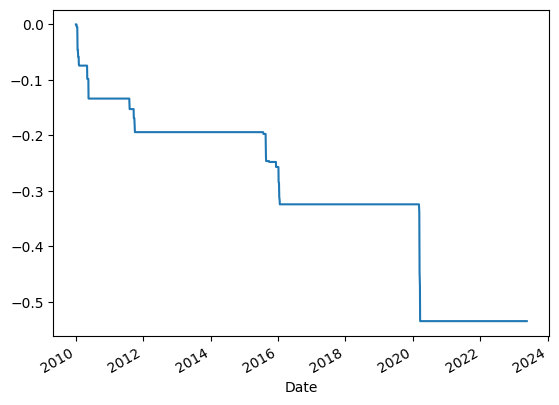

In [34]:
#Maximum Drawdown (MDD) calculation
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [35]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")

Maximum Drawdown for the given period is: -53.511632575865285 %


In [36]:
#Cumulative returns
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00337711,  0.00375284, ..., -0.0252497 ,
        0.00651364, -0.00029714])

In [37]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00337711, 1.00714262, ..., 2.11030608, 2.12405185,
       2.12342071])

In [38]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 212.3420705565414%


In [39]:
# Sharpe ratio
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31    0.031675
2012-12-31    0.033941
2013-12-31    0.029945
2014-12-31    0.007473
2015-12-31   -0.120761
2016-12-31    0.073927
2017-12-31    0.153148
2018-12-31   -0.138734
2019-12-31    0.113556
2020-12-31   -0.075085
2021-12-31    0.451663
2022-12-31    0.206610
2023-12-31   -0.048178
Freq: A-DEC, Name: Close, dtype: float64

In [40]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.027489
2010-03-31    0.033196
2010-04-30    0.010839
2010-05-31   -0.076497
                ...   
2023-01-31    0.062563
2023-02-28   -0.032986
2023-03-31    0.005914
2023-04-30   -0.017486
2023-05-31   -0.062722
Freq: M, Name: Close, Length: 161, dtype: float64

In [41]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 5.53214981901067%


In [42]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 0.9373365378036065


In [43]:
# Sortino ratio
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.076497
2010-08-31   -0.009032
2010-11-30   -0.012899
2011-01-31   -0.016460
2011-03-31   -0.005829
                ...   
2022-09-30   -0.046184
2022-12-31   -0.117890
2023-02-28   -0.032986
2023-04-30   -0.017486
2023-05-31   -0.062722
Name: Close, Length: 69, dtype: float64

In [44]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 1.2280350396646236
